# Import Library


In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler



# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTENC

# Model Saving
import pickle
import warnings

warnings.filterwarnings('ignore')




# Data Loading

In [2]:
drive.mount('/content/gdrive')

#Call the existing data set
df = pd.read_csv('/content/gdrive/My Drive/Data_latih/application_train.csv')

df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
first = df.iloc[:, :70]
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [4]:
second = df.iloc[:, 71:122]
second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NONLIVINGAREA_MODE            137829 non-null  float64
 1   APARTMENTS_MEDI               151450 non-null  float64
 2   BASEMENTAREA_MEDI             127568 non-null  float64
 3   YEARS_BEGINEXPLUATATION_MEDI  157504 non-null  float64
 4   YEARS_BUILD_MEDI              103023 non-null  float64
 5   COMMONAREA_MEDI               92646 non-null   float64
 6   ELEVATORS_MEDI                143620 non-null  float64
 7   ENTRANCES_MEDI                152683 non-null  float64
 8   FLOORSMAX_MEDI                154491 non-null  float64
 9   FLOORSMIN_MEDI                98869 non-null   float64
 10  LANDAREA_MEDI                 124921 non-null  float64
 11  LIVINGAPARTMENTS_MEDI         97312 non-null   float64
 12  LIVINGAREA_MEDI               153161 non-nul

In [5]:
column = ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Based on this info, some columns will be removed. The columns will be removed because it has too many missing values

In [6]:
df_fix = df.drop(column, axis=1)
df_fix = df_fix.reset_index(drop=True)
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [7]:
# Menghitung modus dari kolom OCCUPATION_TYPE
modus_occupation = df_fix['OCCUPATION_TYPE'].mode()[0]

# Mengisi missing value dengan modus
df_fix['OCCUPATION_TYPE'].fillna(modus_occupation, inplace=True)

There will be some missing values dropped, but not their columns. This is possible as the total amount of missing values in those columns is manageable and may be disregarded.

In [8]:
df_fix = df_fix.dropna()
df_fix = df_fix.reset_index(drop=True)
df_fix

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305180,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
305181,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
305182,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
305183,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305185 entries, 0 to 305184
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

In [10]:
df_fix.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [11]:
columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']

In [12]:
cardinal = []
for i in columns:
    nunique = df[i].nunique()
    type = df[i].dtypes
    print(i, nunique,type)

    if type == 'object' and nunique > 20 or nunique ==1 :
        cardinal.append(i)



cardinal

SK_ID_CURR 307511 int64
TARGET 2 int64
NAME_CONTRACT_TYPE 2 object
CODE_GENDER 3 object
FLAG_OWN_CAR 2 object
FLAG_OWN_REALTY 2 object
CNT_CHILDREN 15 int64
AMT_INCOME_TOTAL 2548 float64
AMT_CREDIT 5603 float64
AMT_ANNUITY 13672 float64
AMT_GOODS_PRICE 1002 float64
NAME_TYPE_SUITE 7 object
NAME_INCOME_TYPE 8 object
NAME_EDUCATION_TYPE 5 object
NAME_FAMILY_STATUS 6 object
NAME_HOUSING_TYPE 6 object
REGION_POPULATION_RELATIVE 81 float64
DAYS_BIRTH 17460 int64
DAYS_EMPLOYED 12574 int64
DAYS_REGISTRATION 15688 float64
DAYS_ID_PUBLISH 6168 int64
FLAG_MOBIL 2 int64
FLAG_EMP_PHONE 2 int64
FLAG_WORK_PHONE 2 int64
FLAG_CONT_MOBILE 2 int64
FLAG_PHONE 2 int64
FLAG_EMAIL 2 int64
OCCUPATION_TYPE 18 object
CNT_FAM_MEMBERS 17 float64
REGION_RATING_CLIENT 3 int64
REGION_RATING_CLIENT_W_CITY 3 int64
WEEKDAY_APPR_PROCESS_START 7 object
HOUR_APPR_PROCESS_START 24 int64
REG_REGION_NOT_LIVE_REGION 2 int64
REG_REGION_NOT_WORK_REGION 2 int64
LIVE_REGION_NOT_WORK_REGION 2 int64
REG_CITY_NOT_LIVE_CITY 2 int64


['ORGANIZATION_TYPE']

Based on cardinality checking, some column will be dropped causes by its cardinality. The columns that will be droped are :
- `ORGANIZATION_TYPE`

In [13]:
df_final = df_fix.drop(cardinal, axis=1)
df_final = df_final.reset_index(drop=True)
df_final

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305180,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
305181,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
305182,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
305183,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_final.to_csv('data_final.csv', index=False)

# EDA

In [15]:
df_final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_6

In [16]:
final_columns =['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [17]:
col_num = []
col_cat = []

for i in final_columns:
    if df_final[i].dtypes == 'object':
        col_cat.append(i)

    else:
        col_num.append(i)

print('numerical columns are: ',col_num )
print('categorical columns are: ',col_cat)

numerical columns are:  ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_1

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305185 entries, 0 to 305184
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

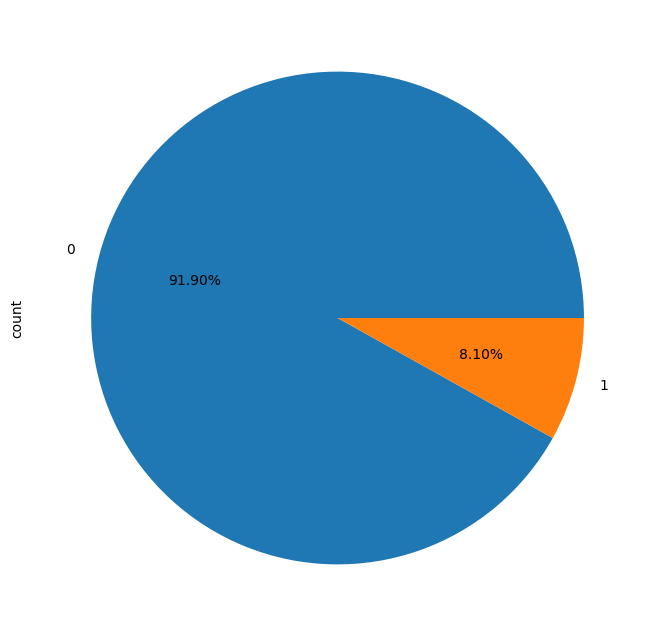

In [19]:
fig,ax1 = plt.subplots(figsize=(8,8))

df_final['TARGET'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

## Categorical Columns

In [20]:
def categorical_analytic (feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_final, x=feature, hue='TARGET')
    plt.title('Categorical Column Analytics')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

    fig,ax1 = plt.subplots(figsize=(8,8))

    df_final[feature].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
    plt.show()

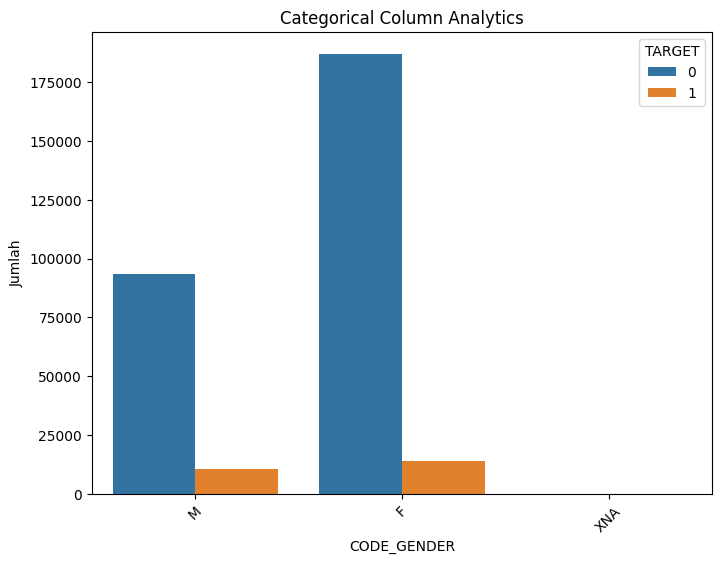

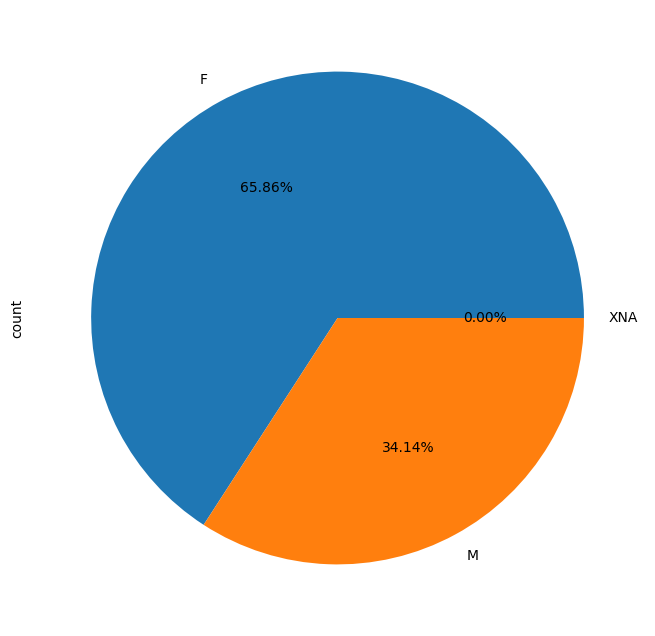

In [21]:
categorical_analytic('CODE_GENDER')

Based on term, the bank's customer that has the lowest risk is the bank's customer who chose a 36-month term. So as a data scientist, I suggest the bank prioritise customers who choose a 36-month term to reduce the risk of default payment on credit.


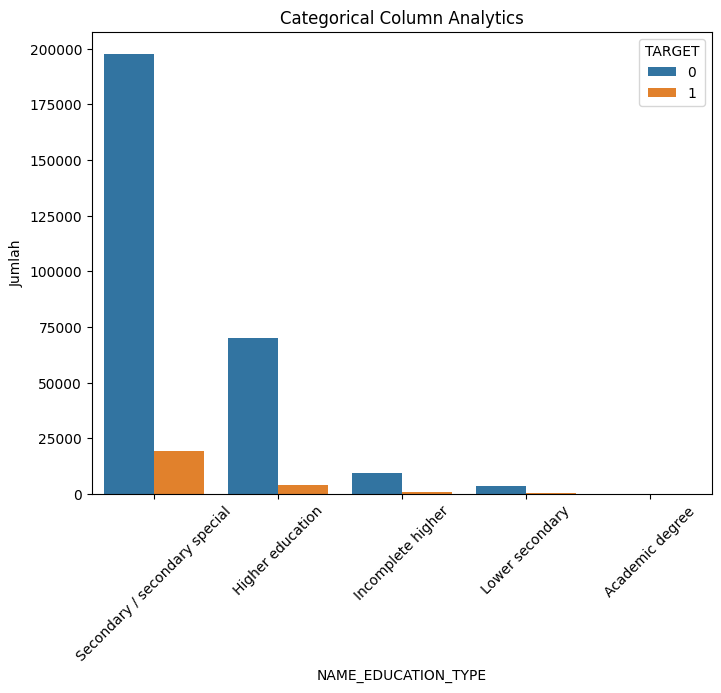

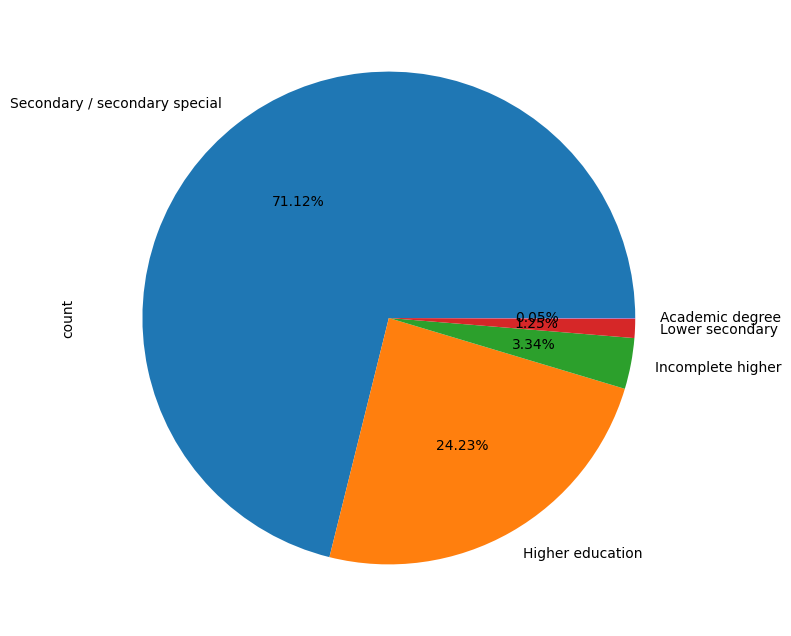

In [22]:
categorical_analytic('NAME_EDUCATION_TYPE')

Based on the grade of the customer, bank customers in grades A,B, C, and D have the lowest risk. So as a data scientist, I suggest prioritising customers based on grades A,B, C, and D.


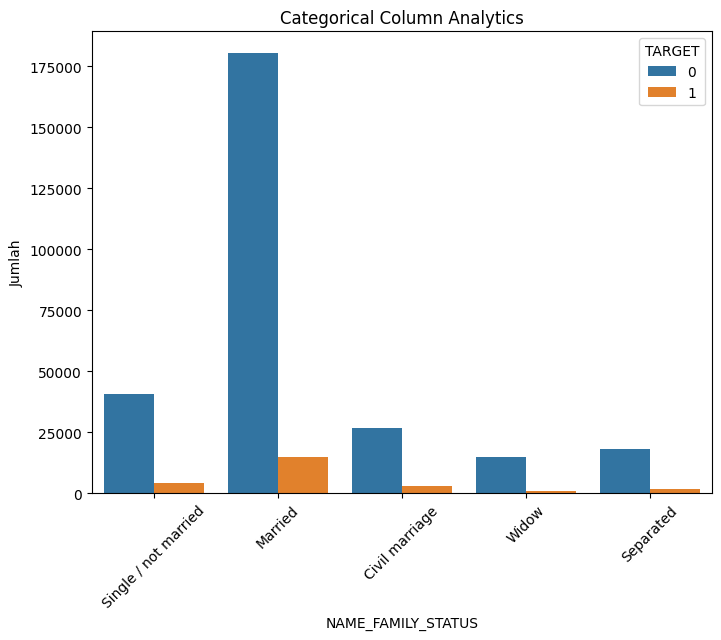

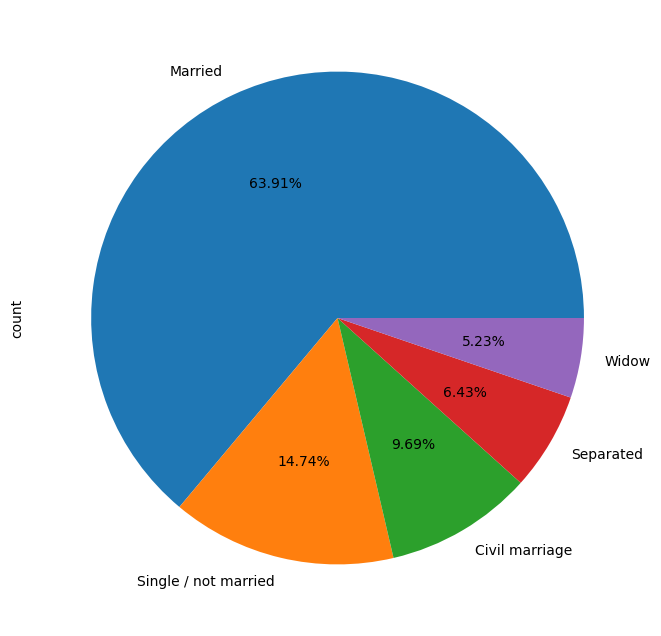

In [23]:
categorical_analytic('NAME_FAMILY_STATUS')

Based on home ownership, there is no effect on loan risk.


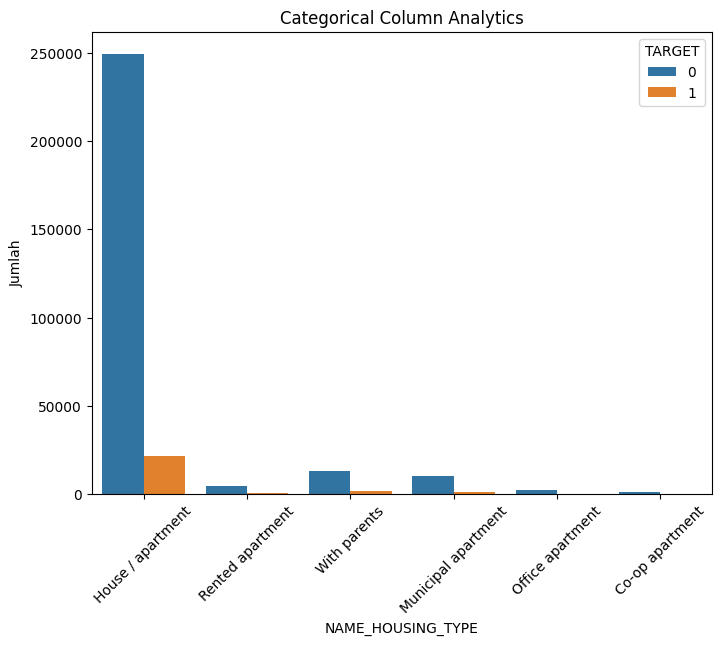

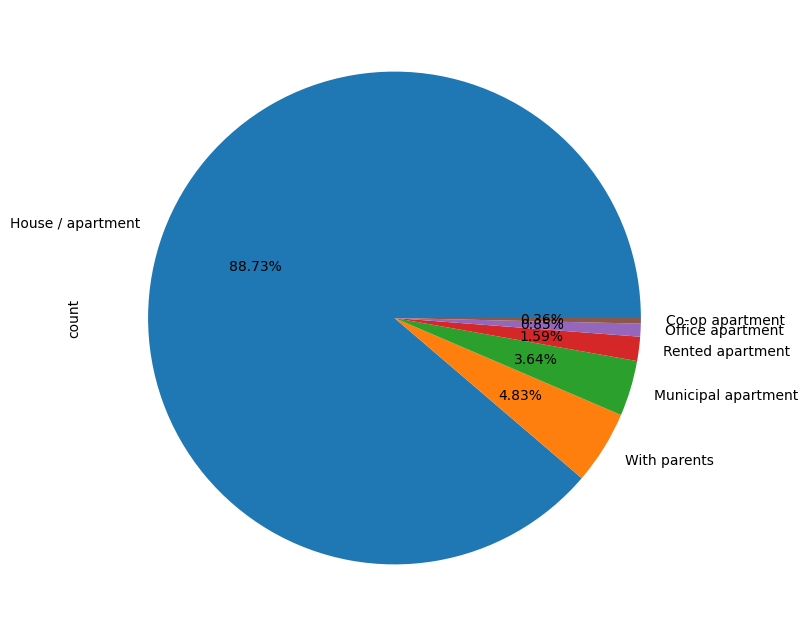

In [24]:
categorical_analytic('NAME_HOUSING_TYPE')

## Numerical Columns

In [25]:
def numerical_analytic(feature):

    plt.figure(figsize=(10, 6))
    sns.barplot(x='TARGET', y=feature, data=df_final, estimator=np.mean, ci=None)
    plt.title(f'Mean of {feature} on loan_risk')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y=feature, data=df_final)
    plt.title(f'Box plot of {feature} on loan_risk')
    plt.show()

    print('------CORRELATION------')

    correlation, p_value = kendalltau(df_final['TARGET'], df_final[feature])
    if p_value <0.05 :
        print ('There is correlation between', feature ,'with loan risk')

    else :
        print('There is no correlation between', feature ,'with loan risk')





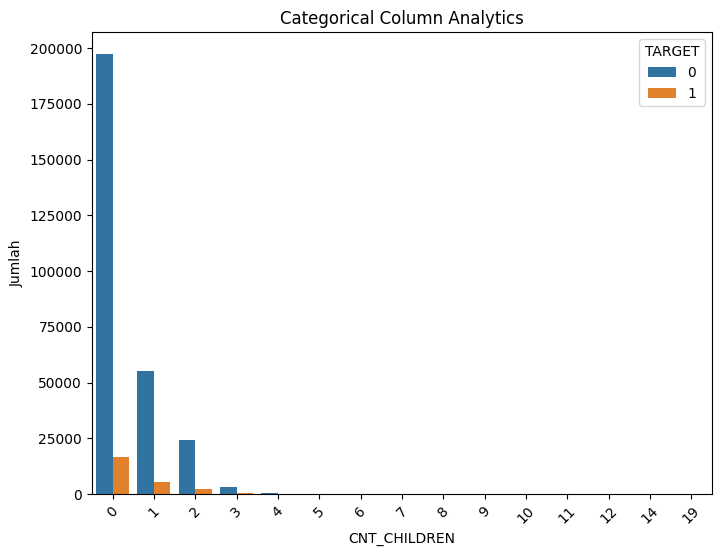

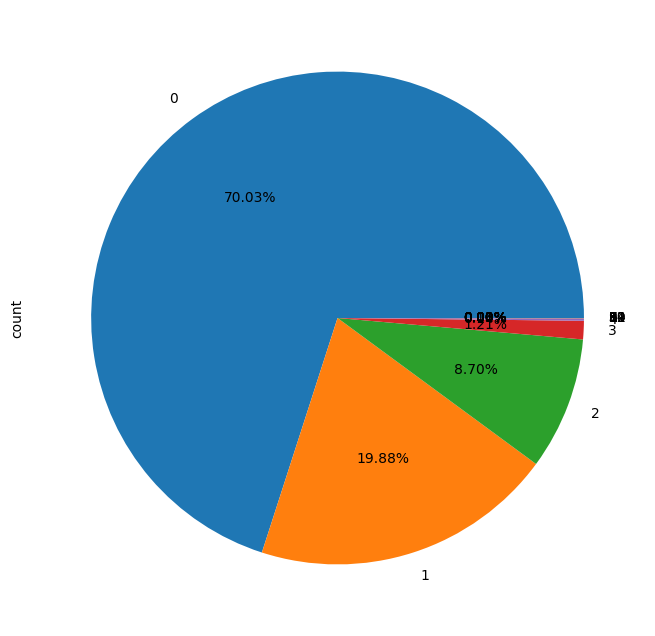

In [26]:
categorical_analytic('CNT_CHILDREN')

# Feature Engineering

In [27]:
correlation_num = []
for i in col_num:
    correlation, p_value = kendalltau(df_final['TARGET'], df_final[i])


    if p_value <0.05 :
        correlation_num.append(i)
print('The column that has correlation with loan status are', correlation_num)

The column that has correlation with loan status are ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_21']


In [28]:
correlation_cat = []
for i in col_cat :
    tabel_korelasi = pd.crosstab(df_final['TARGET'], df_final[i])
    tes_korelasi = stats.chi2_contingency(tabel_korelasi)
    pval = tes_korelasi.pvalue
    corr = tes_korelasi.statistic

    if i == 'loan_risk':
        pass

    elif pval < 0.05 :
        correlation_cat.append(i)
        print(i,'pvalue ;',pval,'correlation :',corr)

print('')
print('The column that has correlation with loan status are ', correlation_cat)




NAME_CONTRACT_TYPE pvalue ; 1.9100455345756868e-61 correlation : 273.55081147687264
CODE_GENDER pvalue ; 2.8813770358747195e-202 correlation : 928.1278409349284
FLAG_OWN_CAR pvalue ; 1.932997335958356e-33 correlation : 145.20917073854667
FLAG_OWN_REALTY pvalue ; 0.00020091067982042944 correlation : 13.822547289497596
NAME_TYPE_SUITE pvalue ; 1.1233429627996288e-05 correlation : 32.84451040366791
NAME_INCOME_TYPE pvalue ; 2.0457191122081084e-268 correlation : 1262.598989109515
NAME_EDUCATION_TYPE pvalue ; 6.971374261749634e-215 correlation : 998.6584979999533
NAME_FAMILY_STATUS pvalue ; 9.443919075410015e-109 correlation : 508.55752042285724
NAME_HOUSING_TYPE pvalue ; 1.1122681660515831e-88 correlation : 420.53218004401947
OCCUPATION_TYPE pvalue ; 7.628946786752257e-242 correlation : 1187.1060380777278
WEEKDAY_APPR_PROCESS_START pvalue ; 0.018266862555961473 correlation : 15.268675705477404

The column that has correlation with loan status are  ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLA

In [29]:
print('Total numerical columns that will be used on this case is ', len(correlation_num))
print('Total categorical columns that will be used on this case is ', len(correlation_cat))

Total numerical columns that will be used on this case is  38
Total categorical columns that will be used on this case is  11


In [30]:
# Data fix setelah feature
data_final = pd.concat([df_final[correlation_num],df_final[correlation_cat],df_final['TARGET']],axis=1)
data_final

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,TARGET
0,0,202500.0,406597.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,...,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,1
1,0,270000.0,1293502.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,...,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,0
2,0,67500.0,135000.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,...,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,0
3,0,135000.0,312682.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,...,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,0
4,0,121500.0,513000.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,...,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305180,0,157500.0,254700.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1,...,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,0
305181,0,72000.0,269550.0,225000.0,0.025164,-20775,365243,-4388.0,-4090,0,...,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Laborers,MONDAY,0
305182,0,153000.0,677664.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,1,...,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,0
305183,0,171000.0,370107.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,1,...,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,1


# Data Preparation

## Spliting

In [31]:
# Memisahkan target dari fitur
x = data_final.drop('TARGET', axis=1)
y = data_final['TARGET']

In [32]:
# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, stratify=y)


In [33]:
# Memilih fitur numerik dan kategorikal
x_train_num = x_train[correlation_num]
x_train_cat = x_train[correlation_cat]

x_test_num = x_test[correlation_num]
x_test_cat = x_test[correlation_cat]

## Numerical Column Check

In [34]:
# Cek kenormalan data train menggunakan skewness
for i in correlation_num :
    skew = x_train_num[i].skew()

    print('Skewness of', i ,'is', skew )


Skewness of CNT_CHILDREN is 1.9906561913113172
Skewness of AMT_INCOME_TOTAL is 385.5891300024533
Skewness of AMT_CREDIT is 1.226451303911075
Skewness of AMT_GOODS_PRICE is 1.3406982384236712
Skewness of REGION_POPULATION_RELATIVE is 1.48603428509655
Skewness of DAYS_BIRTH is -0.11654404840846785
Skewness of DAYS_EMPLOYED is 1.6641734492640712
Skewness of DAYS_REGISTRATION is -0.5910167498066169
Skewness of DAYS_ID_PUBLISH is 0.3495868723780323
Skewness of FLAG_EMP_PHONE is -1.6646594270284418
Skewness of FLAG_WORK_PHONE is 1.5049009050413613
Skewness of FLAG_PHONE is 0.9713306695119289
Skewness of CNT_FAM_MEMBERS is 0.9949958134218168
Skewness of REGION_RATING_CLIENT is 0.08904057106188977
Skewness of REGION_RATING_CLIENT_W_CITY is 0.06093493659273442
Skewness of HOUR_APPR_PROCESS_START is -0.024953634066929554
Skewness of REG_REGION_NOT_LIVE_REGION is 7.918357409363818
Skewness of REG_REGION_NOT_WORK_REGION is 4.080068429155689
Skewness of REG_CITY_NOT_LIVE_CITY is 3.139055933380709
S

In [35]:
# Cek kenormalan data test menggunakan skewness
for i in correlation_num :
    skew = x_test_num[i].skew()

    print('Skewness of', i ,'is', skew )


Skewness of CNT_CHILDREN is 1.9174323836697984
Skewness of AMT_INCOME_TOTAL is 55.58682106559096
Skewness of AMT_CREDIT is 1.2362577697319512
Skewness of AMT_GOODS_PRICE is 1.3519487278107916
Skewness of REGION_POPULATION_RELATIVE is 1.487399760020804
Skewness of DAYS_BIRTH is -0.10891785707598646
Skewness of DAYS_EMPLOYED is 1.6577550428087355
Skewness of DAYS_REGISTRATION is -0.5875998553330616
Skewness of DAYS_ID_PUBLISH is 0.3498822671630327
Skewness of FLAG_EMP_PHONE is -1.6584978555538235
Skewness of FLAG_WORK_PHONE is 1.4923016767012613
Skewness of FLAG_PHONE is 0.978567133472362
Skewness of CNT_FAM_MEMBERS is 0.963422137077469
Skewness of REGION_RATING_CLIENT is 0.0893959323377948
Skewness of REGION_RATING_CLIENT_W_CITY is 0.06285238770495062
Skewness of HOUR_APPR_PROCESS_START is -0.032921328154241994
Skewness of REG_REGION_NOT_LIVE_REGION is 8.005742385224208
Skewness of REG_REGION_NOT_WORK_REGION is 4.160608143199731
Skewness of REG_CITY_NOT_LIVE_CITY is 3.153226192950179
Sk

In [36]:
# penentuan data outlier pada data train
for i in correlation_num:
    skew = x_train_num[i].skew()

    q1 = x_train_num[i].quantile(0.25)
    q3 = x_train_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_train_num[(x_train_num[i]>upper_boundary)|((x_train_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_train_num)*100

    print('Precentage outlier of', i ,'is', persen_outlier, '%')






Precentage outlier of CNT_CHILDREN is 1.3999705096908432 %
Precentage outlier of AMT_INCOME_TOTAL is 4.505463898946541 %
Precentage outlier of AMT_CREDIT is 2.117158444877697 %
Precentage outlier of AMT_GOODS_PRICE is 4.781116372036633 %
Precentage outlier of REGION_POPULATION_RELATIVE is 2.696315349705916 %
Precentage outlier of DAYS_BIRTH is 0.0 %
Precentage outlier of DAYS_EMPLOYED is 23.47592443927454 %
Precentage outlier of DAYS_REGISTRATION is 0.215852679522257 %
Precentage outlier of DAYS_ID_PUBLISH is 0.0 %
Precentage outlier of FLAG_EMP_PHONE is 18.01366384324262 %
Precentage outlier of FLAG_WORK_PHONE is 19.937496928092795 %
Precentage outlier of FLAG_PHONE is 0.0 %
Precentage outlier of CNT_FAM_MEMBERS is 1.3119091698477974 %
Precentage outlier of REGION_RATING_CLIENT is 26.176335665252225 %
Precentage outlier of REGION_RATING_CLIENT_W_CITY is 25.38255484378328 %
Precentage outlier of HOUR_APPR_PROCESS_START is 0.7302947392565164 %
Precentage outlier of REG_REGION_NOT_LIVE_R

In [37]:
# penentuan data outlier pada data test
for i in correlation_num:
    skew = x_test_num[i].skew()

    q1 = x_test_num[i].quantile(0.25)
    q3 = x_test_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_test_num[(x_test_num[i]>upper_boundary)|((x_test_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_test_num)*100

    print('Precentage outlier of', i ,'is', persen_outlier, '%')






Precentage outlier of CNT_CHILDREN is 1.3483624686665465 %
Precentage outlier of AMT_INCOME_TOTAL is 4.5955731769254715 %
Precentage outlier of AMT_CREDIT is 2.1544309189508004 %
Precentage outlier of AMT_GOODS_PRICE is 4.703704310500188 %
Precentage outlier of REGION_POPULATION_RELATIVE is 2.76717400920753 %
Precentage outlier of DAYS_BIRTH is 0.0 %
Precentage outlier of DAYS_EMPLOYED is 23.657781345741107 %
Precentage outlier of DAYS_REGISTRATION is 0.21790061765814178 %
Precentage outlier of DAYS_ID_PUBLISH is 0.0 %
Precentage outlier of FLAG_EMP_PHONE is 18.08411291511706 %
Precentage outlier of FLAG_WORK_PHONE is 20.099284040827694 %
Precentage outlier of FLAG_PHONE is 0.0 %
Precentage outlier of CNT_FAM_MEMBERS is 1.2697216442485706 %
Precentage outlier of REGION_RATING_CLIENT is 26.17264937660763 %
Precentage outlier of REGION_RATING_CLIENT_W_CITY is 25.279748349361864 %
Precentage outlier of HOUR_APPR_PROCESS_START is 0.755279584514311 %
Precentage outlier of REG_REGION_NOT_LIV

In [38]:
x_train_num.isnull().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_8                0
FLAG_DOCUM

In [39]:
x_test_num.isnull().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_8                0
FLAG_DOCUM

## Categorical Column Check

In [40]:
x_train_cat.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
dtype: int64

In [41]:
x_test_cat.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
dtype: int64

# Labelling

In [42]:
for i in correlation_cat :
    print(i,data_final[i].unique())

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' '

In [43]:
correlation_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [44]:
correlation_cat_ordinal = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
correlation_cat_non_ordinal = ['CODE_GENDER','WEEKDAY_APPR_PROCESS_START']

# Pipeline

In [45]:
num_pipeline = Pipeline([
    ('Scaler', MinMaxScaler()),

])

num_tr = num_pipeline.fit_transform(x_train[correlation_num])
num_tr

array([[0.        , 0.00093482, 0.15218427, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00039624, 0.07572135, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00151187, 0.13993483, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05263158, 0.00112717, 0.05617978, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00067076, 0.25254607, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00074247, 0.05606742, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
for i in correlation_cat_ordinal:
    unique = data_final[i].unique()
    print(i,unique)

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR 

In [47]:
cat_pipeline = Pipeline([

    ('Encoder',OrdinalEncoder(categories=[
                            ['Cash loans' ,'Revolving loans'],
                            ['N' ,'Y'],
                            ['Y', 'N'],
                            ['Unaccompanied' ,'Family' ,'Spouse, partner' ,'Children', 'Other_A' ,'Other_B', 'Group of people'],
                            ['Working' ,'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student' ,'Businessman' ,'Maternity leave'],
                            ['Secondary / secondary special', 'Higher education' ,'Incomplete higher', 'Lower secondary', 'Academic degree'],
                            ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated'],
                            ['House / apartment', 'Rented apartment', 'With parents' ,'Municipal apartment', 'Office apartment', 'Co-op apartment'],
                            ['Laborers', 'Core staff' ,'Accountants' ,'Managers' ,'Drivers', 'Sales staff', 'Cleaning staff' ,'Cooking staff' ,'Private service staff' ,'Medicine staff' ,'Security staff' ,
                             'High skill tech staff', 'Waiters/barmen staff' ,'Low-skill Laborers', 'Realty agents', 'Secretaries' ,'IT staff', 'HR staff']
                        ]))
])

cat_tr = cat_pipeline.fit_transform(x_train[correlation_cat_ordinal])
cat_tr

array([[0., 0., 0., ..., 1., 0., 5.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 4., 0., 6.],
       ...,
       [1., 0., 0., ..., 1., 0., 3.],
       [0., 0., 1., ..., 2., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [48]:
cat_pipeline2 = Pipeline([
    ('Encoder',OneHotEncoder(sparse=False))
])

cat_tr2 = cat_pipeline2.fit_transform(x_train[correlation_cat_non_ordinal])
cat_tr2

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [49]:
prep = ColumnTransformer([
    ('num',num_pipeline,correlation_num),
    ('cat_ordinal',cat_pipeline,correlation_cat_ordinal),
    ('cat_non_ordinal',cat_pipeline2,correlation_cat_non_ordinal),

])

prep


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaler', MinMaxScaler())]),
                                 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                                  'AMT_CREDIT', 'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
                                  'FLAG_WORK_PHONE', 'FLAG_PHONE',
                                  'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                                  'REGION_RATING_C...
                                                                              'Secretaries',
                                                                              'IT '
                                                                              'staff',
                                                                              'HR '
                                                                              'staff']]))]),
                                 ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                  'OCCUPATION_TYPE']),
                                ('cat_non_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False))]),
                                 ['CODE_GENDER',
                                  'WEEKDAY_APPR_PROCESS_START'])])

In [50]:
x_train_new = prep.fit_transform(x_train)
x_train_new = pd.DataFrame(x_train_new)
x_train_new

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.000000,0.000935,0.152184,0.134831,0.134537,0.555975,0.045707,0.982936,0.886619,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000396,0.075721,0.067416,0.392880,0.225930,1.000000,0.818945,0.374739,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.001512,0.139935,0.108989,0.045016,0.365502,0.037215,0.870096,0.681673,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.105263,0.000935,0.044944,0.044944,0.113324,0.610710,0.036327,0.965994,0.456301,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.000742,0.210697,0.157303,0.491595,0.336584,0.046122,0.913748,0.608587,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244143,0.000000,0.000242,0.150292,0.123596,0.147830,0.453495,0.034480,0.690175,0.899125,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
244144,0.105263,0.000550,0.024270,0.016854,0.276330,0.656426,0.034370,0.968912,0.310824,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
244145,0.052632,0.001127,0.056180,0.056180,0.344429,0.735738,0.044337,0.957280,0.653050,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
244146,0.000000,0.000671,0.252546,0.219101,0.491595,0.355581,0.028252,0.815013,0.659441,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
x_test_new = prep.transform(x_test)
x_test_new = pd.DataFrame(x_test_new)
x_test_new

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.001781,0.270787,0.270787,0.361433,0.609865,0.029617,0.713643,0.930527,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.001127,0.144953,0.123596,0.429796,0.345152,0.018630,0.670760,0.632069,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.000550,0.007398,0.005618,0.361433,0.463191,0.045851,0.807271,0.931916,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000792,0.050562,0.050562,0.094575,0.159414,1.000000,0.896725,0.424205,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.001127,0.251247,0.207865,0.093190,0.119391,1.000000,0.720250,0.408642,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61032,0.0,0.000550,0.190674,0.157303,0.282797,0.163078,1.000000,0.839373,0.455468,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61033,0.0,0.001031,0.094191,0.079775,0.038481,0.255299,1.000000,0.431623,0.417396,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61034,0.0,0.001320,0.249079,0.213483,0.147830,0.599944,0.038374,0.752959,0.405725,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61035,0.0,0.004782,0.290463,0.258427,0.491595,0.628016,0.039164,0.927367,0.349034,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modelling

In [52]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=12)

## KNN

In [53]:
x_train_knn = np.ascontiguousarray(x_train_new)
x_test_knn = np.ascontiguousarray(x_test_new)

In [54]:
knn.fit(x_train_knn,y_train)

KNeighborsClassifier()

In [55]:
y_train_predict_knn = knn.predict(x_train_knn)
y_test_predict_knn = knn.predict(x_test_knn)


In [56]:
print('------Clasification Report KNN Train-------')
print(classification_report(y_train,y_train_predict_knn))

print('')
print('------Clasification Report KNN Test-------')
print(classification_report(y_test,y_test_predict_knn))


------Clasification Report KNN Train-------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    224373
           1       0.62      0.07      0.12     19775

    accuracy                           0.92    244148
   macro avg       0.77      0.53      0.54    244148
weighted avg       0.90      0.92      0.89    244148


------Clasification Report KNN Test-------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56093
           1       0.14      0.02      0.03      4944

    accuracy                           0.91     61037
   macro avg       0.53      0.50      0.49     61037
weighted avg       0.86      0.91      0.88     61037



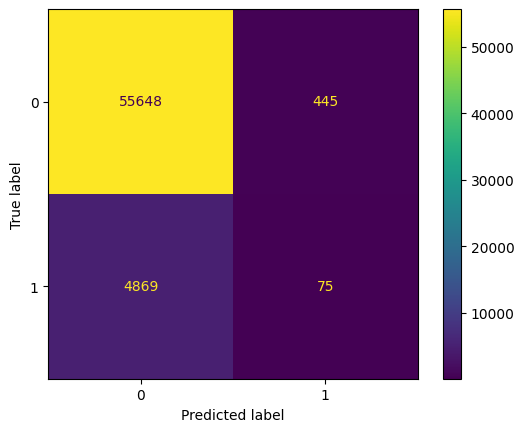

In [57]:
ConfusionMatrixDisplay.from_estimator( knn, x_test_knn, y_test)

## Logistic Regression

In [58]:
lr.fit(x_train_new,y_train)

LogisticRegression()

In [59]:
y_train_predict_lr = lr.predict(x_train_new)
y_test_predict_lr = lr.predict(x_test_new)


In [60]:
print('------Clasification Report Logistic Regression Train-------')
print(classification_report(y_train,y_train_predict_lr))

print('')
print('------Clasification Report Logistic Regression Test-------')
print(classification_report(y_test,y_test_predict_lr))


------Clasification Report Logistic Regression Train-------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    224373
           1       0.00      0.00      0.00     19775

    accuracy                           0.92    244148
   macro avg       0.46      0.50      0.48    244148
weighted avg       0.84      0.92      0.88    244148


------Clasification Report Logistic Regression Test-------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56093
           1       0.00      0.00      0.00      4944

    accuracy                           0.92     61037
   macro avg       0.46      0.50      0.48     61037
weighted avg       0.84      0.92      0.88     61037



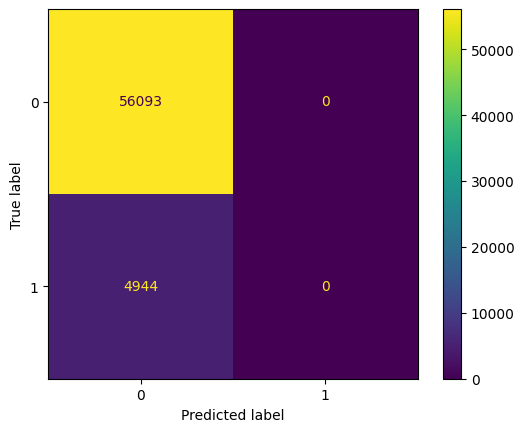

In [61]:
ConfusionMatrixDisplay.from_estimator( lr, x_test_new, y_test)

## Random Forest

In [62]:
rf.fit(x_train_new,y_train)

RandomForestClassifier(random_state=12)

In [63]:
y_train_predict_rf = rf.predict(x_train_new)
y_test_predict_rf = rf.predict(x_test_new)


In [64]:
print('------Clasification Report Random Forest Train-------')
print(classification_report(y_train,y_train_predict_rf))

print('')
print('------Clasification Report Random Forest Test-------')
print(classification_report(y_test,y_test_predict_rf))


------Clasification Report Random Forest Train-------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    224373
           1       1.00      1.00      1.00     19775

    accuracy                           1.00    244148
   macro avg       1.00      1.00      1.00    244148
weighted avg       1.00      1.00      1.00    244148


------Clasification Report Random Forest Test-------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56093
           1       0.00      0.00      0.00      4944

    accuracy                           0.92     61037
   macro avg       0.46      0.50      0.48     61037
weighted avg       0.84      0.92      0.88     61037



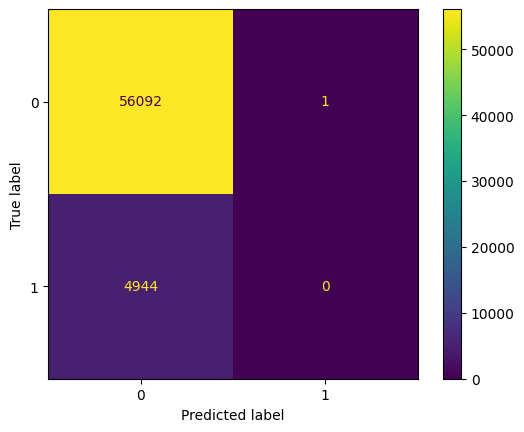

In [65]:
ConfusionMatrixDisplay.from_estimator( rf, x_test_new, y_test)

# Model Final

In [66]:
#create a new default table to later compare with the default f1 score test values ​​and those already using random seach
all_reports_rf = {}
def performance_report(all_reports_rf, y_train, y_train_predict_knn, y_test, y_test_predict_knn, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_predict_knn),
      'train - recall' : recall_score(y_train, y_train_predict_knn),
      'train - accuracy' : accuracy_score(y_train, y_train_predict_knn),
      'train - f1_score' : f1_score(y_train, y_train_predict_knn),
      'test - precision' : precision_score(y_test, y_test_predict_knn),
      'test - recall' : recall_score(y_test, y_test_predict_knn),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_knn),
      'test - f1_score' : f1_score(y_test, y_test_predict_knn),
  }
  all_reports_rf[name] = score_reports
  return all_reports_rf

all_reports_rf = performance_report(all_reports_rf, y_train, y_train_predict_knn, y_test, y_test_predict_knn, 'Model KNN')
pd.DataFrame(all_reports_rf)

,Model KNN
test - accuracy_score,0.912938
test - f1_score,0.027452
test - precision,0.144231
test - recall,0.015170
train - accuracy,0.921113
train - f1_score,0.119583
train - precision,0.622561
train - recall,0.066144


In [67]:
# Membuat Pipeline semua proses
all_process = Pipeline([
    ("preprocess", prep),
    ("classification", rf)
])

all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'FLAG_EMP_PHONE',
                                                   'FLAG_WORK_PHONE',
                                                   'FLAG_PHONE',
                                                   'CNT_FAM_MEMBERS',
                                                   'REGION_R...
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE']),
                                                 ('cat_non_ordinal',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['CODE_GENDER',
                                                   'WEEKDAY_APPR_PROCESS_START'])])),
                ('classification', RandomForestClassifier(random_state=12))])

In [68]:
#Call the existing data set
inf = pd.read_csv('/content/gdrive/My Drive/Data_latih/application_test.csv')

inf

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [69]:
data_final.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       '

In [70]:
data_inf = inf[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']]

In [71]:
for col in data_inf.columns:
    # Periksa tipe data kolom
    if data_inf[col].dtype == 'object':
        # Jika kolom adalah objek (non-numerik), isi dengan modus
        data_inf[col].fillna(data_inf[col].mode()[0], inplace=True)
    else:
        # Jika kolom adalah numerik, isi dengan rata-rata
        data_inf[col].fillna(data_inf[col].mean(), inplace=True)

In [72]:
y_pred_inf = all_process.predict(data_inf)
y_pred_inf

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,0
1,0
2,0
3,0
4,0
...,...
48739,0
48740,0
48741,0
48742,0
